In [1]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 4章 顧客の全体像を把握する１０本ノック

引き続き、スポーツジムの会員データを使って顧客の行動を分析していきます。  
３章で顧客の全体像を把握しました。  
ここからは、機械学習を用いて顧客のグループ化や顧客の利用予測行なっていきましょう。  
ここでは、教師なし学習、教師あり学習の回帰を取り扱います。

### ノック31：データを読み込んで確認しよう

In [2]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [3]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

### ノック32：クラスタリングで顧客をグループ化しよう

In [4]:
customer_clustering = customer[["mean", "median","max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
customer_clustering_sc.shape
print(customer_clustering_sc)

(4192, 5)

[[-0.28120614 -0.13367635  0.08117747 -0.5336197   2.03402524]
 [-0.14054502 -0.13367635 -0.37992814 -0.02114919  2.03402524]
 [-0.42186727 -0.13367635 -0.84103375 -0.02114919  2.03402524]
 ...
 [ 1.50050144  1.46662237  0.08117747  2.54120338 -1.28811491]
 [ 3.18843493  3.06692109  1.46449428  4.07861492 -1.28811491]
 [ 2.62579043  2.53348819  1.00338868  3.56614441 -1.28811491]]


In [6]:
#クラスタリング
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()
customer_clustering.tail()

[1 2 3 0]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


,mean,median,max,min,membership_period,cluster
4187,8.0,8.0,8,8,1,0
4188,10.0,10.0,10,10,1,0
4189,8.0,8.0,8,8,1,0
4190,11.0,11.0,11,11,1,0
4191,10.0,10.0,10,10,1,0


### ノック33：クラスタリング結果を分析しよう

In [7]:
customer_clustering.columns = ["月内平均値","月内中央値", "月内最大値", "月内最小値","会員期間", "cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [8]:
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


### ノック34：クラスタリング結果を可視化してみよう

In [9]:
X = customer_clustering_sc
print(X)
print(X.shape)

[[-0.28120614 -0.13367635  0.08117747 -0.5336197   2.03402524]
 [-0.14054502 -0.13367635 -0.37992814 -0.02114919  2.03402524]
 [-0.42186727 -0.13367635 -0.84103375 -0.02114919  2.03402524]
 ...
 [ 1.50050144  1.46662237  0.08117747  2.54120338 -1.28811491]
 [ 3.18843493  3.06692109  1.46449428  4.07861492 -1.28811491]
 [ 2.62579043  2.53348819  1.00338868  3.56614441 -1.28811491]]
(4192, 5)


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]
pca_df.head()

PCA(n_components=2)

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1


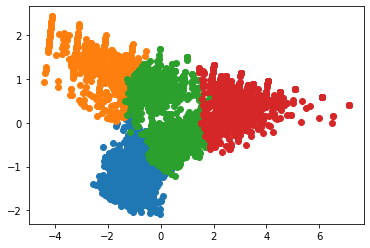

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

### ノック35：クラスタリング結果をもとに退会顧客の傾向を把握しよう

In [12]:
customer_clustering.head()
customer.head()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [13]:
customer_clustering111 = pd.concat([customer_clustering, customer], axis=1)

In [14]:
customer_clustering111[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,1,0,OA832399
1,1,0,PL270116
2,1,0,OA974876
3,1,0,HD024127
4,1,0,HD661448
...,...,...,...
4187,0,0,HD676663
4188,0,0,HD246549
4189,0,0,GD037007
4190,0,0,OA953150


In [15]:
customer_clustering111.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [16]:
#cluster=2,is_deleted=0⇒0件
test1 = customer_clustering111.loc[(customer_clustering111["cluster"] == 2) & (customer_clustering111["is_deleted"] == 0)]
test1.groupby(["cluster","routine_flg"],as_index=False).count()

,cluster,routine_flg,月内平均値,月内中央値,月内最大値,月内最小値,会員期間,customer_id,name,class,...,is_deleted,class_name,price,campaign_name,mean,median,max,min,calc_date,membership_period


In [17]:
customer_clustering111.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


### ノック36：翌月の利用回数予測を行うためのデータ準備をしよう

In [18]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [19]:
uselog_months.loc[uselog_months["customer_id"] == "AS002855"]

,年月,customer_id,count
0,201804,AS002855,4
2991,201805,AS002855,5
6054,201806,AS002855,5
9158,201807,AS002855,5
12291,201808,AS002855,3
15424,201809,AS002855,7
18532,201810,AS002855,3
21602,201811,AS002855,5
24647,201812,AS002855,2
27760,201901,AS002855,6


In [20]:
year_months = list(uselog_months["年月"].unique())
predict_data = pd.DataFrame()
year_months.sort()
year_months
predict_data

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

""


In [21]:
for i in range(6, len(year_months)):
    tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]]
    tmp.rename(columns={"count":"count_pred"}, inplace=True)
    for j in range(1, 7):
        tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-j]]
        del tmp_before["年月"]
        tmp_before.rename(columns={"count":"count_{}".format(j-1)}, inplace=True)
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [22]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


### ノック37：特徴となる変数を付与しよう

In [23]:
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [24]:
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
from dateutil.relativedelta import relativedelta
predict_data["period"] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = delta.years*12 + delta.months
predict_data.head()

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


### ノック38：来月の利用回数予測モデルを作成しよう

In [27]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]
predict_data.head(10)

,年月,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
49,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,2018-04-09,2018-10-01,5
55,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,2018-04-15,2018-10-01,5
56,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,2018-04-06,2018-10-01,5
72,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,2018-04-03,2018-10-01,5
96,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,2018-04-12,2018-10-01,5
145,201810,AS501123,3,4.0,5.0,5.0,8.0,7.0,7.0,2018-04-01,2018-10-01,6
147,201810,AS509237,3,2.0,1.0,2.0,4.0,8.0,9.0,2018-04-06,2018-10-01,5
156,201810,AS546422,1,5.0,7.0,4.0,10.0,8.0,8.0,2018-04-10,2018-10-01,5
186,201810,AS628722,3,5.0,4.0,6.0,4.0,7.0,9.0,2018-04-15,2018-10-01,5
191,201810,AS639549,4,2.0,2.0,3.0,5.0,9.0,8.0,2018-04-15,2018-10-01,5


In [28]:
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
y = predict_data["count_pred"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

In [30]:
X_train.head()
X_test.head()
y_train.head()
y_test.head()

,count_0,count_1,count_2,count_3,count_4,count_5,period
10329,9.0,6.0,7.0,8.0,6.0,11.0,5
5446,3.0,4.0,2.0,3.0,5.0,7.0,6
13762,7.0,7.0,6.0,10.0,8.0,10.0,5
11028,3.0,1.0,1.0,5.0,4.0,5.0,9
5808,7.0,9.0,6.0,6.0,10.0,6.0,7


,count_0,count_1,count_2,count_3,count_4,count_5,period
3610,8.0,8.0,7.0,8.0,9.0,11.0,6
10447,3.0,4.0,5.0,3.0,5.0,6.0,9
6459,4.0,1.0,2.0,1.0,5.0,8.0,5
12426,7.0,8.0,10.0,10.0,9.0,6.0,6
13517,6.0,8.0,8.0,9.0,5.0,10.0,6


10329    9
5446     4
13762    7
11028    5
5808     6
Name: count_pred, dtype: int64

3610      8
10447     1
6459      3
12426     7
13517    11
Name: count_pred, dtype: int64

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6082964595963711
0.6055687787143544


### ノック39：モデルに寄与している変数を確認しよう

In [33]:
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.318488
1,count_1,0.196398
2,count_2,0.158099
3,count_3,0.190806
4,count_4,0.093843
5,count_5,0.068352
6,period,0.084401


### ノック40：来月の利用回数を予測しよう

In [34]:
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [35]:
model.predict(x_pred)

array([3.87130639, 1.98578242])

In [36]:
uselog_months.to_csv("use_log_months.csv",index=False)